# Twisted cuprates

Construct a cluster system that describes two square lattices on top of each other and twisted by an angle of $53^\circ$.
The unit cell contains 10 sites and is illustrated below (the sites are numbered and the two colors correspond to the two layers). Build the system with two clusters: one 8-site cluster in the center, and a 2-site cluster on the corner (they clusters are surrounded by dashed lines on the figure). Construct the operators representing nearest-neighbor hopping, $d$-wave superconductivity on the first layer, and the corresponding operator on the second layer. Also construct operators $V_1$, $V_2$ and $V_3$ for inter-layer hopping, represented by the gray lines on the figure. 
The sites coordinates are integers if the length of the side of the superunit cell is 5; for instance, the coordinates of site 7 are $(2,1)$.
Hint: the various hopping and pairing operators are best consrtucted with the help of the function `pyqcm.density_wave()`.

<img src="./twisted_cluster.png" width="400" height="400">

In [1]:
from pyqcm import *
from pyqcm.vca import *
from pyqcm.draw_operator import *

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 125

Number of openMP threads = 4


In [2]:
new_cluster_model("small_cluster", 2, 0) # Creating the peripheral 2-site cluster
new_cluster_model("big_cluster", 8, 0) # Creating the central 8-site cluster

add_cluster("small_cluster", [0,0,0], [[0,0,0], [0,0,1]]) # Both sites are superposed in the "z" direction
add_cluster("big_cluster", [0,0,0],
    [
        [1,2,0], 
        [3,1,0], 
        [2,4,0], 
        [4,3,0], 
        [2,1,1], 
        [4,2,1], 
        [1,3,1], 
        [3,4,1]
    ]
) # Placing sites as to mimick two square lattices one on top of the other at an angle of ~53 degrees

lattice_model("twisted_Cu", [[5,0,0],[0,5,0]], [[5,0,0],[0,5,0]]) # The superlattice is square 
set_basis([[0.2,0,0], [0,0.2,0]]) # For graphical purposes (displaying the correct Brillouin zone)

In [3]:
# Defining a standard on site interaction operator 
interaction_operator("U")

# Defining a NN hopping term on the bottom layer
density_wave("t1", "N", [0,0,0], link=[2,-1,0], amplitude=-2) # No modulation of the amplitude from site to site--> Q=0
density_wave("t1", "N", [0,0,0], link=[1,2,0], amplitude=-2) # Amplitude =-2 ----> Quirk of density wave
# Defining a NN hopping term on the top layer
density_wave("t1", "N", [0,0,0], link=[1,-2,0], amplitude=-2) # Notice how the link vector is different from the previous hopping operator
density_wave("t1", "N", [0,0,0], link=[2,1,0], amplitude=-2)

# Defining a NNN hopping term on the bottom layer
density_wave("t2", "N", [0,0,0], link=[3,1,0], amplitude=-2) # The difference here is the hopping happens two sites over 
density_wave("t2", "N", [0,0,0], link=[-1,3,0], amplitude=-2) 
# Defining a NNN hopping term on the top layer
density_wave("t2", "N", [0,0,0], link=[1,3,0], amplitude=-2)
density_wave("t2", "N", [0,0,0], link=[-3,1,0], amplitude=-2)

# Defining singlet pairing superconduction on the bottom layer
density_wave("D", "singlet", [0,0,0], link=[2,-1,0], amplitude=2) # same link vectors as the t1 operator
density_wave("D", "singlet", [0,0,0], link=[1,2,0], amplitude=-2)
# Defining singlet pairing superconduction on the top layer
density_wave("D", "singlet", [0,0,0], link=[1,-2,0], amplitude=2)
density_wave("D", "singlet", [0,0,0], link=[2,1,0], amplitude=-2)

# Defining the V1 inter-layer hopping term
hopping_operator("V1", [0,0,1], -1, band1=1, band2=2) # this hopping operator hops "straight up and down"

# Defining the V2 inter-layer hopping term
hopping_operator("V2", [-1,0,1], -1, band1=4, band2=7) # this operator hops diagonally between closest sites of the different layers in the big cluster
hopping_operator("V2", [0,-1,1], -1, band1=6, band2=8)
hopping_operator("V2", [1,0,1], -1, band1=5, band2=10)
hopping_operator("V2", [0,1,1], -1, band1=3, band2=9)

# Defining the V3 inter-layer hopping term
hopping_operator("V3", [1,1,1], -1, band1=4, band2=8) # this operator hops diagonally between farthest sites of the different layers in the big cluster
hopping_operator("V3", [-1,1,1], -1, band1=6, band2=10)
hopping_operator("V3", [-1,-1,1], -1, band1=5, band2=9)
hopping_operator("V3", [1,-1,1], -1, band1=3, band2=7)

print_model("model.out") # Creating the model.out file for draw_operator()

### Time to look at what these operators look like

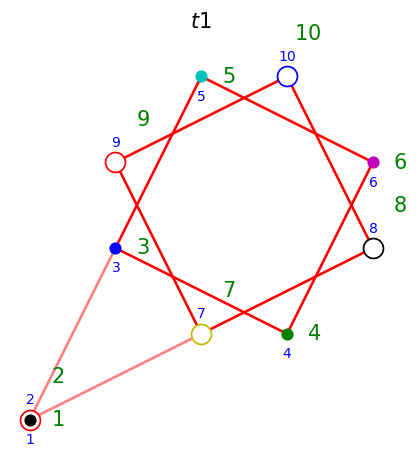

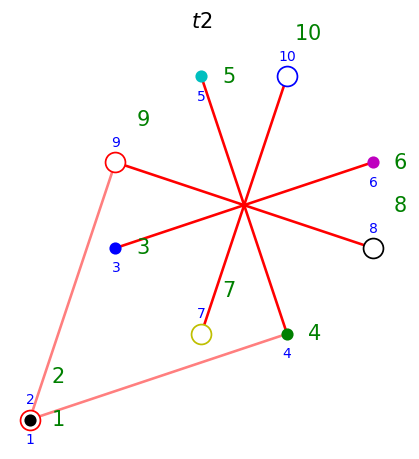

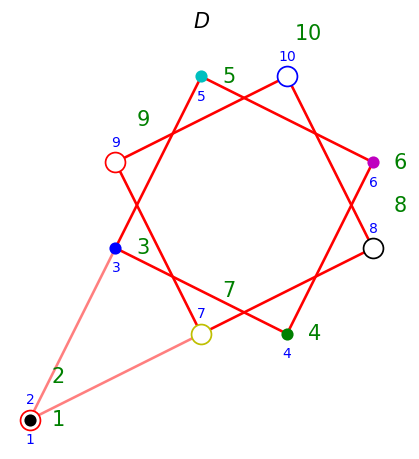

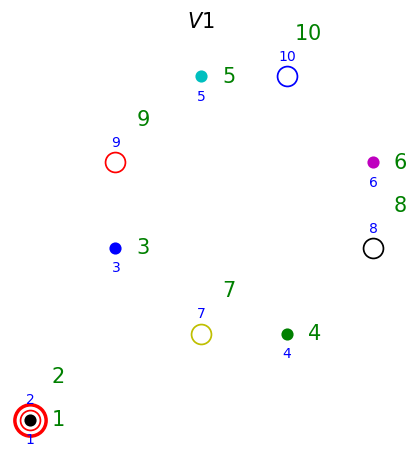

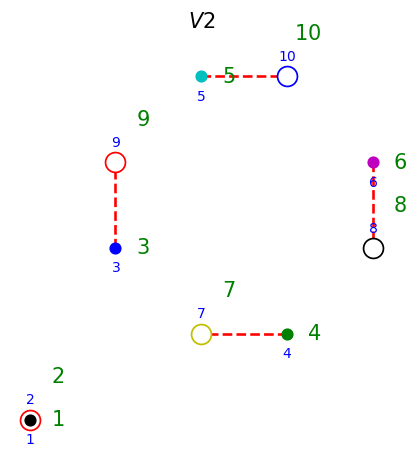

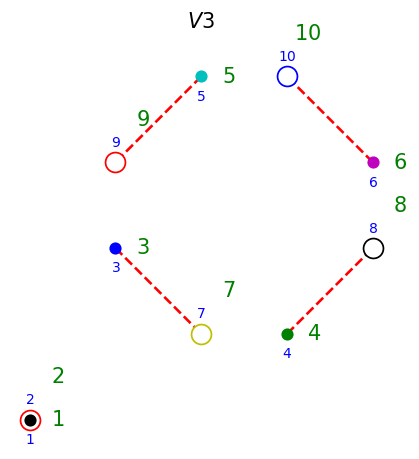

In [4]:
draw_operator("t1")
draw_operator("t2")
draw_operator("D")
draw_operator("V1")
draw_operator("V2")
draw_operator("V3")

### This gives a good visual intuition for what most of these operators *do*